### Generative models

Most **classification algorithms** fall into one of two categories: 
 - discriminative classifiers
 - generative classifiers
 
**Discriminative classifiers** model the target variable, y, as a direct function of the predictor variables, x. Example: logistic regression uses the following model, where 𝜷 is a length-D vector of coefficients and x is a length-D vector of predictors:
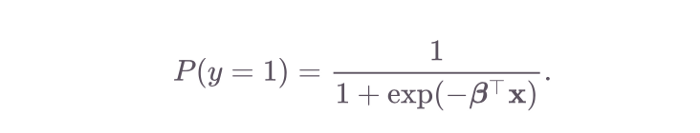

**Generative classifiers** instead view the predictors as being generated according to their class — i.e., they see x as a function of y, rather than the other way around. They then use Bayes’ rule to get from p(x|y = k) to P(y = k|x), as explained below.

Generative models can be broken down into the three following steps. Suppose we have a classification task with K unordered classes, represented by k = 1, 2, …, K.

   - Estimate the prior probability that a target belongs to any given class. I.e., estimate P(y = k) for k = 1, 2, …, K.
   - Estimate the density of the predictors conditional on the target belonging to each class. I.e., estimate p(x|y = k) for k = 1, 2, …, K.
   - Calculate the posterior probability that the target belongs to any given class. I.e., calculate P(y = k|x), which is proportional to p(x|y = k)P(y = k) by Bayes’ rule.

We then classify an observation as belonging to the class k for which the following expression is greatest:

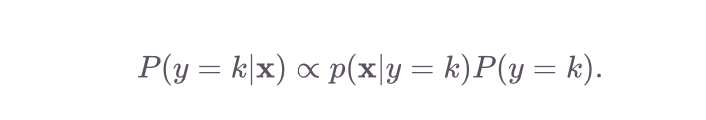

### Class Priors estimation for Generative classifiers

Let I_nk be an indicator which equals 1 if y_n = k and 0 otherwise.

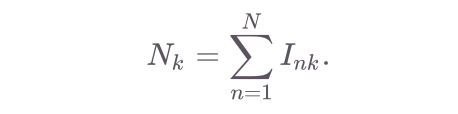

Our estimate of P(y = k) is just the sample fraction of the observations from class k.

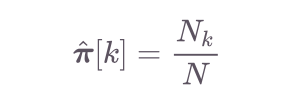

### Data Likelihood

The next step is to model the conditional distribution of x given y so that we can estimate this distribution’s parameters. This of course depends on the family of distributions we choose to model x. Three common approaches are detailed below.sns.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()

X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

### Linear Discriminative Analysis (LDA)

In LDA, we assume the following distribution for x

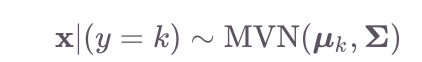

for k = 1, 2, …, K. Note that each class has the same covariance matrix but a unique mean vector.

Train Accuracy  0.9777777777777777


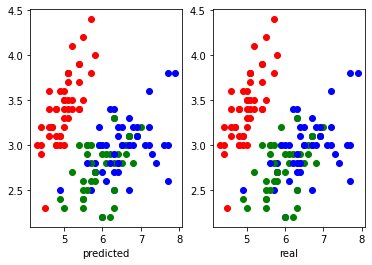

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)
print("Train Accuracy ", np.mean(y_pred == Y_train))

colors = {0: 'r',1: 'g',2: 'b'}

fig, ax = plt.subplots(1, 2)
for x, y in zip(X_train, y_pred):
    ax[0].scatter(x[0],x[1],c=colors[y])
ax[0].set_xlabel("predicted")

for x, y in zip(X_train, Y_train):
    ax[1].scatter(x[0],x[1],c=colors[y])
ax[1].set_xlabel("real")

plt.show()

### Quadratic Discriminant Analysis (QDA)

QDA looks very similar to LDA but assumes each class has its own covariance matrix. I.e.,

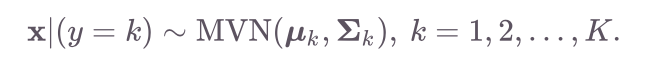



Train Accuracy  0.9851851851851852


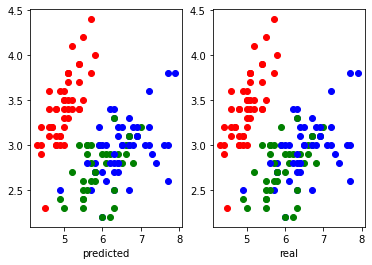

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)
print("Train Accuracy ", np.mean(y_pred == Y_train))

colors = {0: 'r',1: 'g',2: 'b'}

fig, ax = plt.subplots(1, 2)
for x, y in zip(X_train, y_pred):
    ax[0].scatter(x[0],x[1],c=colors[y])
ax[0].set_xlabel("predicted")

for x, y in zip(X_train, Y_train):
    ax[1].scatter(x[0],x[1],c=colors[y])
ax[1].set_xlabel("real")

plt.show()

### Naive Bayes

Naive Bayes assumes the random variables within x are independent conditional on the class of the observation. That is, if x is D-dimensional,

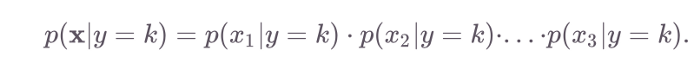

Train Accuracy  0.9555555555555556


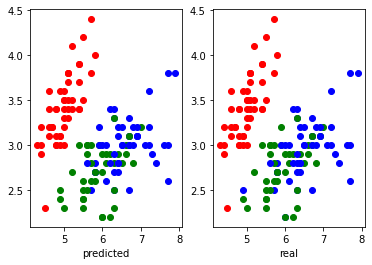

In [36]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)
print("Train Accuracy ", np.mean(y_pred == Y_train))

colors = {0: 'r',1: 'g',2: 'b'}

fig, ax = plt.subplots(1, 2)
for x, y in zip(X_train, y_pred):
    ax[0].scatter(x[0],x[1],c=colors[y])
ax[0].set_xlabel("predicted")

for x, y in zip(X_train, Y_train):
    ax[1].scatter(x[0],x[1],c=colors[y])
ax[1].set_xlabel("real")

plt.show()

### References

1. https://www.section.io/engineering-education/linear-discriminant-analysis/
2. https://towardsdatascience.com/generative-classification-algorithms-from-scratch-d6bf0a81dcf7
3. 